## Random Matrix Theory

In [1]:
import numpy.linalg as la
from numpy.random import default_rng
import numpy.random as rd
import numpy as np
import matplotlib.pyplot as plt

1. __Generate an N x N matrix whose elements are independent random numbers with Gaussian distributions of mean zero and standard deviation $\sigma$ = 1__


2. __Add each matrix to its transpose to symmetrize it.__

In [2]:
# def rad_mat(mu, sigma, n1, n2):
#     gauss_var = rd.normal(mu, sigma, n1*n2)
#     emp_array = np.zeros((n1, n2))
#     indexer = 0
#     init_index = 0
#     for i in range(n2):
#         init_index = indexer
#         indexer += n1
#         emp_array[i] = gauss_var[init_index:indexer]
#     return emp_array

def rad_mat(mu, sigma, n1, n2):
    return rd.normal(mu, sigma, size=(n1, n2))

def mean_split(l):
    l.sort()
    vals = []
    for i in range(int(len(l)/2)):
        val = l[i+1] - l[i]
        vals.append(val)
    return vals

(a) _Generate an ensemble with M = 1000 or so Gaussian orthogonal ensemble (GOE) matrices of size N = 2, 4 and 10. Find the eigenvalues $\lambda_{n}$ of each matrix, sorted in increasing order. Find the difference between neighboring eigenvalues $\lambda_{n+1} - \lambda_{n}$, for n say, equal to N/2. Plot a historgram of these eigenvalue splittings divided by the mean splitting, with bin size small enough to see some of the fluctuations._

In [3]:
def cum_m_split(M, N, mu, sig):
    matrix_array = []
    eigenval_array = []
    m_split = []
    for i in range(M):
        mat = rad_mat(mu, sig, N, N)
        mat = mat + mat.T
        matrix_array.append(mat)
        eigenval = la.eigvals(mat)
        eigenval_array.append(eigenval)
        split = mean_split(eigenval)
        for i in split:
            m_split.append(i)
    m_split = np.array(m_split)
    m_split = m_split / m_split.mean()
    m_split.sort()
    return m_split, eigenval_array, matrix_array


mu = 0
sigma = 1

Text(0, 0.5, 'Counts')

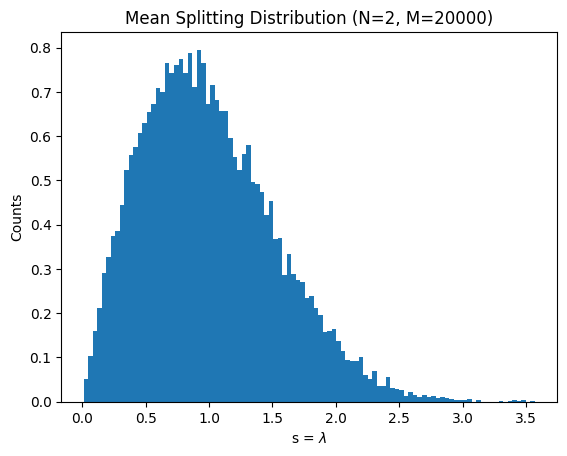

In [4]:
samples = 20000
mat_size = 2
m_split, _, _ = cum_m_split(samples, mat_size, mu, sigma)

fig, ax = plt.subplots()
ax.hist(m_split, 100, density=True)
ax.set_title(f"Mean Splitting Distribution (N={mat_size}, M={samples})")
ax.set_xlabel("s = $\lambda$")
ax.set_ylabel("Counts")

Text(0, 0.5, 'Counts')

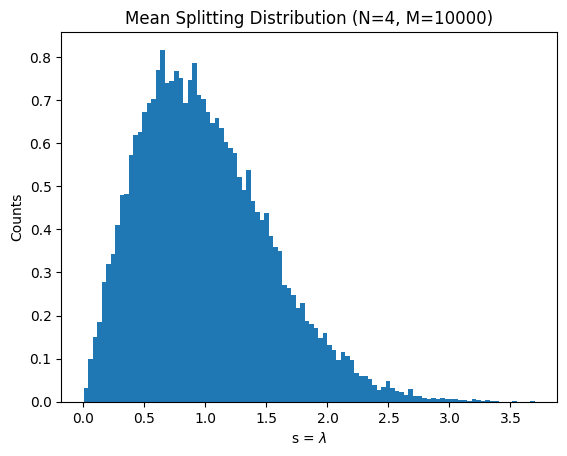

In [5]:
samples = 10000
mat_size = 4
m_split, _, _ = cum_m_split(samples, mat_size, mu, sigma)

fig, ax = plt.subplots()
ax.hist(m_split, 100, density=True)
ax.set_title(f"Mean Splitting Distribution (N={mat_size}, M={samples})")
ax.set_xlabel("s = $\lambda$")
ax.set_ylabel("Counts")

Text(0, 0.5, 'Counts')

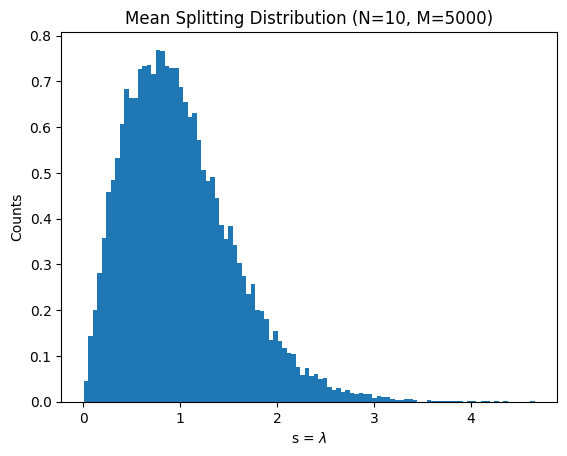

In [6]:
samples = 5000
mat_size = 10
m_split, _, _ = cum_m_split(samples, mat_size, mu, sigma)

fig, ax = plt.subplots()
ax.hist(m_split, 100, density=True)
ax.set_title(f"Mean Splitting Distribution (N={mat_size}, M={samples})")
ax.set_xlabel("s = $\lambda$")
ax.set_ylabel("Counts")

Text(0, 0.5, 'Counts')

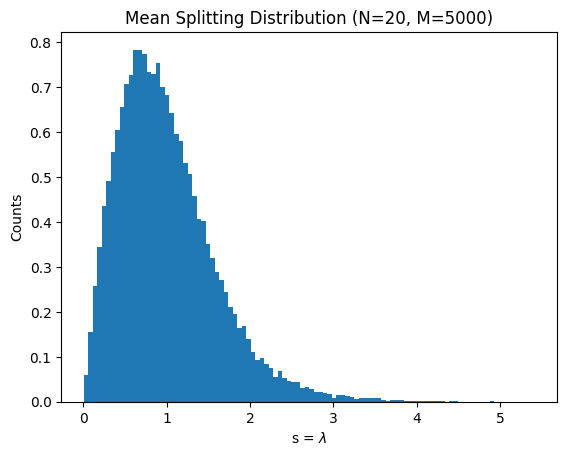

In [7]:
samples = 5000
mat_size = 20
m_split, _, _ = cum_m_split(samples, mat_size, mu, sigma)

fig, ax = plt.subplots()
ax.hist(m_split, 100, density=True)
ax.set_title(f"Mean Splitting Distribution (N={mat_size}, M={samples})")
ax.set_xlabel("s = $\lambda$")
ax.set_ylabel("Counts")

Level repulsion at $\lambda = 0$ 

(c) _Calculate analytically the standard deviation of a diagonal and an off-diagonal element of the GOE ensemble (made by symmetrizing Gaussian random matrices with $\sigma = 1$)_

In [8]:
def cum_ele(matrix_array):
    diag = []
    off_diag = []

    for i in range(len(matrix_array)):
        for j in range(len(matrix_array[i])):
            diag.append(matrix_array[i][j][j])
            for k in range(len(matrix_array[i])):
                if j != k:
                    off_diag.append(matrix_array[i][j][k])

    return diag, off_diag

In [9]:
_, _, matrix_array = cum_m_split(1000, 2, 0, 1)
diag, off_diag = cum_ele(matrix_array)
print(f"The standard deviation of the diagonal element is {np.array(diag).std()}\n"
      f"The standard deviation of the off-diagonal element is {np.array(off_diag).std()}")

The standard deviation of the diagonal element is 2.063134613452011
The standard deviation of the off-diagonal element is 1.3902859648593728


(e) _Plot Wigner surmise along with N = 2, 4, 10_

In [10]:
def wig_sur(s):
    return np.pi * s * np.exp(-np.pi * s**(2) / 4) / 2

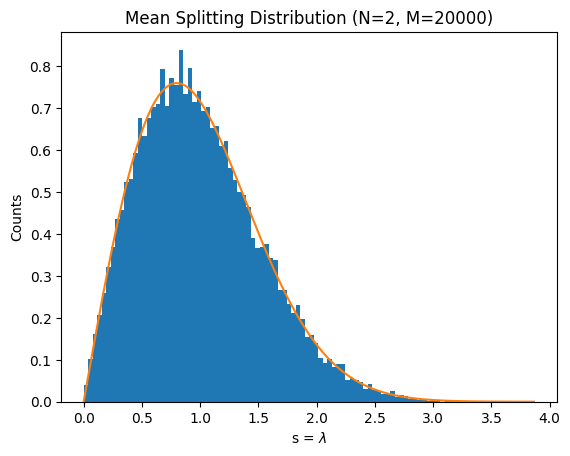

In [11]:
samples = 20000
mat_size = 2
m_split, _, _ = cum_m_split(samples, mat_size, mu, sigma)

s_vals = np.arange(min(m_split), max(m_split), 0.01)
y_vals = wig_sur(s_vals)


fig, ax = plt.subplots()
ax.hist(m_split, 100, density=True)
ax.set_title(f"Mean Splitting Distribution (N={mat_size}, M={samples})")
ax.set_xlabel("s = $\lambda$")
ax.set_ylabel("Counts")
ax.plot(s_vals, y_vals)


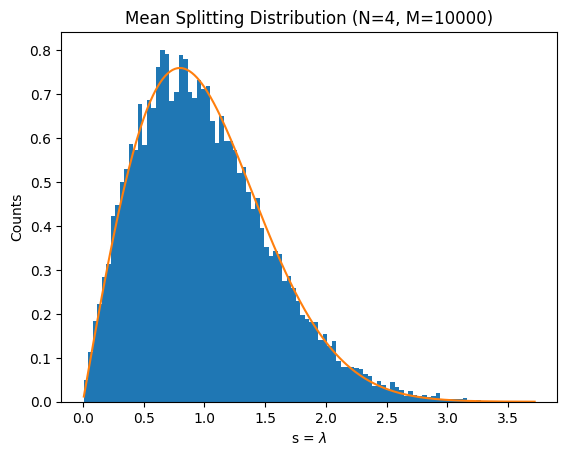

In [12]:
samples = 10000
mat_size = 4
m_split, _, _ = cum_m_split(samples, mat_size, mu, sigma)

s_vals = np.arange(min(m_split), max(m_split), 0.01)
y_vals = wig_sur(s_vals)


fig, ax = plt.subplots()
ax.hist(m_split, 100, density=True)
ax.set_title(f"Mean Splitting Distribution (N={mat_size}, M={samples})")
ax.set_xlabel("s = $\lambda$")
ax.set_ylabel("Counts")
ax.plot(s_vals, y_vals)


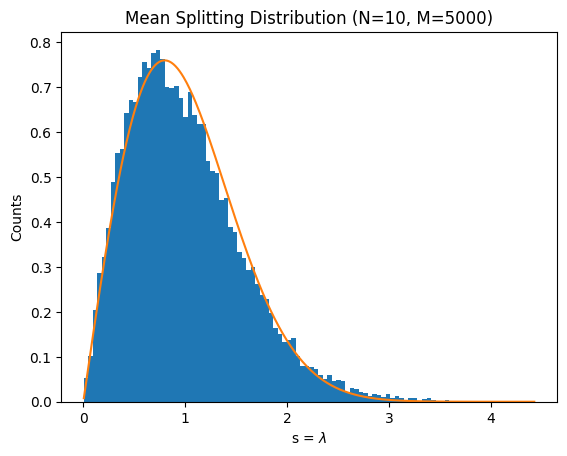

In [13]:
samples = 5000
mat_size = 10
m_split, _, _ = cum_m_split(samples, mat_size, mu, sigma)

s_vals = np.arange(min(m_split), max(m_split), 0.01)
y_vals = wig_sur(s_vals)


fig, ax = plt.subplots()
ax.hist(m_split, 100, density=True)
ax.set_title(f"Mean Splitting Distribution (N={mat_size}, M={samples})")
ax.set_xlabel("s = $\lambda$")
ax.set_ylabel("Counts")
ax.plot(s_vals, y_vals)


The GOE ensemble has some nice statistical properties. The ensemble is invariant under orthogonal transformations.

(f) _Generate an ensemble with $M = 1000 \pm 1$ symmetric matrices with size N = 2, 4 and 10. Plot the eigenvalue distributions as in part (a). Are they universal for N = 2, 4? Do they appear to be nearly universal for N = 10? Plot the Wigner surmise along with your histogram for N = 10._

In [14]:
def rad_mat(mu, sigma, n1, n2):
    mat = np.zeros((n1, n2))
    for i in range(n2):
        for j in range(n1):
            rad_int = rd.choice([1, -1])
            mat[i][j] = rad_int
    return mat

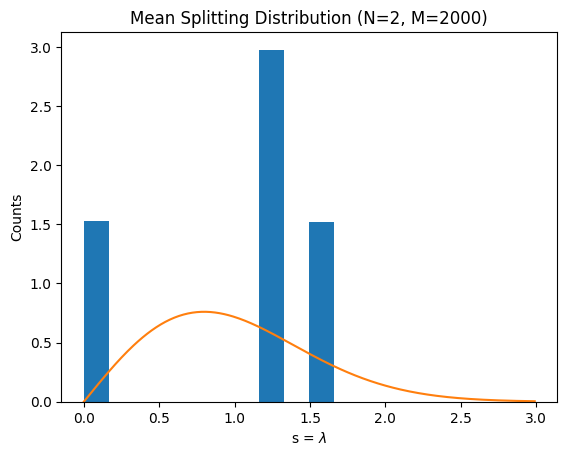

In [15]:
samples = 2000
mat_size = 2
m_split, _, _ = cum_m_split(samples, mat_size, mu, sigma)

s_vals = np.arange(0, 3, 0.01)
y_vals = wig_sur(s_vals)


fig, ax = plt.subplots()
ax.hist(m_split, 10, density=True)
ax.set_title(f"Mean Splitting Distribution (N={mat_size}, M={samples})")
ax.set_xlabel("s = $\lambda$")
ax.set_ylabel("Counts")
ax.plot(s_vals, y_vals)


Text(0, 0.5, 'Counts')

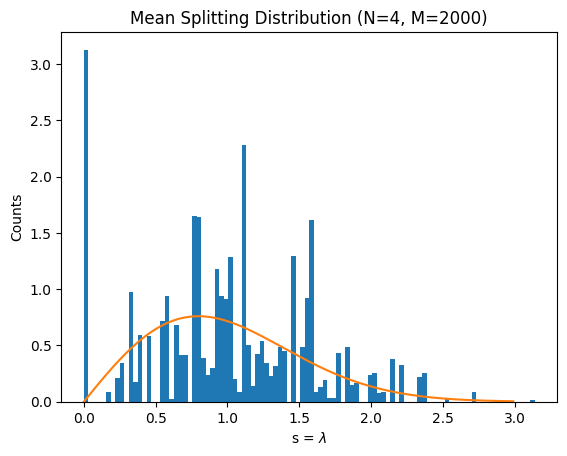

In [16]:
samples = 2000
mat_size = 4
m_split, _, _ = cum_m_split(samples, mat_size, mu, sigma)

s_vals = np.arange(0, 3, 0.01)
y_vals = wig_sur(s_vals)


fig, ax = plt.subplots()
ax.hist(m_split, 100, density=True)
ax.plot(s_vals, y_vals)

ax.set_title(f"Mean Splitting Distribution (N={mat_size}, M={samples})")
ax.set_xlabel("s = $\lambda$")
ax.set_ylabel("Counts")



/usr/lib/python3/dist-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/lib/python3/dist-packages/numpy/lib/histograms.py:905: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)
/home/dio/.local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6740: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


Text(0, 0.5, 'Counts')

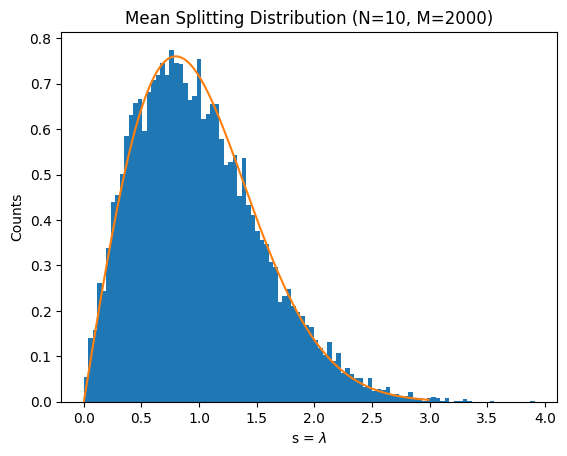

In [17]:
samples = 2000
mat_size = 10
m_split, _, _ = cum_m_split(samples, mat_size, mu, sigma)

s_vals = np.arange(0, 3, 0.01)
y_vals = wig_sur(s_vals)


fig, ax = plt.subplots()
ax.hist(m_split, 100, density=True)
ax.plot(s_vals, y_vals)

ax.set_title(f"Mean Splitting Distribution (N={mat_size}, M={samples})")
ax.set_xlabel("s = $\lambda$")
ax.set_ylabel("Counts")

